# Machine Learning Homework 5 - Final Project

### Submission By:  
<ul>
    <li>Akshay Prakash Tambe (apt321@nyu.edu)</li>
    <li>Snahil Singh (ss11381@nyu.edu)</li>
</ul>

## Data Loading

In [20]:
# Import Packages
import pandas as pd
import numpy as np

In [21]:
def data_load():
    # Loading Comma Seperated Data using read_table pandas function in 'census_train_data' and 'census_test_data' dataframe
    census_train_data= pd.read_csv('census_train.csv')
    census_test_data = pd.read_csv('census_test.csv')

    # Adding Headers to Data
    census_train_data.columns = ["idnum", "age", "workerclass", "interestincome", "traveltimetowork",\
                                 "vehicleoccupancy", "meansoftransport", "marital", "schoolenrollment",\
                                 "educationalattain", "sex", "workarrivaltime", "hoursworkperweek", "ancestry",\
                                 "degreefield", "industryworkedin", "wages"]

    census_test_data.columns = ["idnum", "age", "workerclass", "interestincome", "traveltimetowork",\
                                 "vehicleoccupancy", "meansoftransport", "marital", "schoolenrollment",\
                                 "educationalattain", "sex", "workarrivaltime", "hoursworkperweek", "ancestry",\
                                 "degreefield", "industryworkedin"]

    # Add Wages column to test dataset for consistency
    census_test_data['wages'] = 0
    frames = [census_train_data, census_test_data]
    df = pd.concat(frames)
    df.shape
    return census_train_data, census_test_data, df

## Data Preprocessing
<br/>
<div style="color:blue">
No Missing Values Found in:  
- idnum  
- age  
- interestincome  
- marital  
- sex  
- ancestry  
- wages
</div>

In [22]:
def pre_process_data(data):
    
    # Cleaning workerclass
    # age less than 16 
    data.loc[(data.age <= 16) & (data.workerclass =='?') , 'workerclass'] = '10'
    # people who never worked and not in labour force and last worked more than 5 years ago
    data.loc[(data.traveltimetowork =='?') & (data.vehicleoccupancy =='?') & \
             (data.meansoftransport =='?') & (data.workarrivaltime =='?') & \
             (data.hoursworkperweek =='?') & (data.industryworkedin =='?') & (data.workerclass =='?'), 'workerclass'] = '11' 
     
    # Cleaning traveltimetowork - Filling it with zero's (New Category) as worker who works from home will never travel, 
    # Same applies to a worker who never worked.
    data['traveltimetowork'] = data['traveltimetowork'].replace('?', 0)

    # Cleaning vehicleoccupancy
    # Category 0 - Never Travelled
    data.loc[(data.workerclass == '10') | (data.workerclass == '11') | (data.traveltimetowork == 0) \
             | (data.meansoftransport == '10') | (data.meansoftransport == '11'), 'vehicleoccupancy'] = '0'    
    # Category 10 - Carpool for 10 or more
    data.loc[(data.meansoftransport == '02') | (data.meansoftransport == '04')\
             | (data.meansoftransport == '05'), 'vehicleoccupancy'] = '10'
    # Cateogory 11 - Boat, Taxi, Cycle, Other and NAs
    data['vehicleoccupancy'] = data['vehicleoccupancy'].replace('?', '11')

    # Cleaning meansoftransport - Filling it with zero's (New Category) as non-worked is assumed that he/she will not travel to work
    data['meansoftransport'] = data['meansoftransport'].replace('?', '0')

    # Cleaning schoolenrollment - Filling it with zero's (New Category) as the least age for enrollment is atleast 5 Years
    # 0 - No, less than 3 years
    data['schoolenrollment'] = data['schoolenrollment'].replace('?', '0')

    # Cleaning educationalattain - Filling it with zero's (New Category) as the least age for enrollment is atleast 5 Years
    # 0 - No Education Attainment, less than 3 years
    data['educationalattain'] = data['educationalattain'].replace('?', '0')

    # Cleaning meansoftransport - Filling it with zero's (New Category) as non-worked is assumed that he/she will not travel to work
    data['workarrivaltime'] = data['workarrivaltime'].replace('?', '0')

    # Cleaning hoursworkperweek - Filling it with zero's (New Category) for non-worker
    data['hoursworkperweek'] = data['hoursworkperweek'].replace('?', 0)

    # Cleaning degreefield - Filling it with 1111 (New Category) for unknown degree
    # 1000, less than bachelor's degree (Related to educationattain)
    data['degreefield'] = data['degreefield'].replace('?', '1000')

    # Cleaning industryworkedin - Filling it with 1111 (New Category) for unknown degree
    # 100, less than 16 years old/not in labor force who last worked more than 5 years ago or never worked
    data['industryworkedin'] = data['industryworkedin'].replace('?', '0100')
    
    # Productivity
    data['productivity'] = data['educationalattain'].astype(int) - data['age'].astype(int)

    # Wage Class - For Binary Classifier
    data['wageclass'] = np.where(data['wages'] == 0, 0, 1)
    
    # Convert the categories feature to type 'category'
    data['workerclass'] = data['workerclass'].astype('category')
    data['vehicleoccupancy'] = data['vehicleoccupancy'].astype('category')
    data['meansoftransport'] = data['meansoftransport'].astype('category')
    data['marital'] = data['marital'].astype('category')
    data['schoolenrollment'] = data['schoolenrollment'].astype('category')
    data['educationalattain'] = data['schoolenrollment'].astype('category')
    data['sex'] = data['sex'].astype('category')
    data['workarrivaltime'] = data['workarrivaltime'].astype('category')
    data['ancestry'] = data['ancestry'].astype('category')
    data['degreefield'] = data['degreefield'].astype('category')
    data['industryworkedin'] = data['industryworkedin'].astype('category')
    
    # Convert numerical features to type 'int64'
    data['idnum'] = data['idnum'].astype(int)
    data['age'] = data['age'].astype(int)
    data['interestincome'] = data['interestincome'].astype(int)
    data['traveltimetowork'] = data['traveltimetowork'].astype(int)
    data['hoursworkperweek'] = data['hoursworkperweek'].astype(int)
    data['wageclass'] = data['wageclass'].astype(int)
    data['productivity']  = data['productivity'].astype(int)
    data['wages'] = data['wages'].astype(int)
        
    return data

In [23]:
def data_drop(data, columns):
    if columns is not None:
        data = data.drop(columns ,axis=1)
    return data

In [24]:
census_train_data, census_test_data, df = data_load()

# Perform Data Cleaning
clean_data = pre_process_data(df)
df = clean_data
df.head(5)

,idnum,age,workerclass,interestincome,traveltimetowork,vehicleoccupancy,meansoftransport,marital,schoolenrollment,educationalattain,sex,workarrivaltime,hoursworkperweek,ancestry,degreefield,industryworkedin,wages,productivity,wageclass
0,1,34,3,0,10,1,1,5,1,1,1,168,40,51,1000,7860,34500,-18,1
1,2,57,2,0,15,8,1,5,1,1,1,100,30,51,1000,8390,4700,-41,1
2,3,17,11,0,0,0,0,5,2,2,2,0,0,714,1000,0100,0,-2,0
3,4,42,1,0,20,1,1,1,1,1,1,92,45,21,5001,6990,120000,-20,1
4,5,18,11,0,0,0,0,5,2,2,2,0,0,999,1000,0100,0,-3,0


In [25]:
def plot_info(res, title):
    
    feat = res.keys()
    imp = res.values()
    
    # Plotting Feature_Names on X-Axis and Feature_importances on Y-Axis
    plt.figure(figsize=(12, 8))
    plt.bar(range(len(feat)), imp)
    plt.xticks(range(len(feat)), feat, rotation=40)
    plt.xlabel('Feature Name')
    plt.ylabel('Feature Importance')
    plt.title(title)
    plt.show()

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


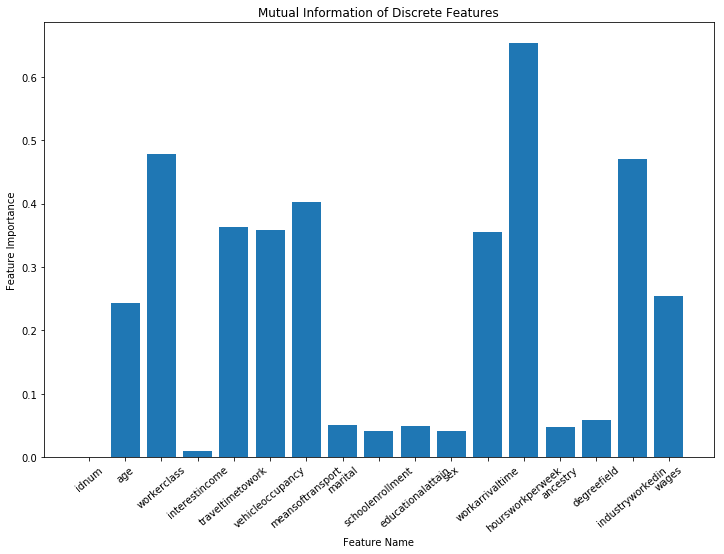

In [26]:
# Mutual Information Gain
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

mutual_df_train = df[:1183]
mutual_df_train_X = mutual_df_train.drop(['wages','wageclass'], axis=1)
mutual_df_train_y = mutual_df_train['wages']
dis_mutual_info = mutual_info_regression(mutual_df_train_X, mutual_df_train_y, copy = True)
dis_res = dict(zip(df.columns.values, dis_mutual_info))
plot_info(dis_res, "Mutual Information of Discrete Features")

<div style="color:blue">
Based on Information Gain, we drop:  
- idnum  
- interestincome  
- ancestry  
- schoolenrollment
</div>

In [27]:
# Drop Columns
columns = ['idnum', 'interestincome', 'ancestry', 'schoolenrollment']
clean_data = data_drop(clean_data, columns)
df = clean_data
df.head(5)

,age,workerclass,traveltimetowork,vehicleoccupancy,meansoftransport,marital,educationalattain,sex,workarrivaltime,hoursworkperweek,degreefield,industryworkedin,wages,productivity,wageclass
0,34,3,10,1,1,5,1,1,168,40,1000,7860,34500,-18,1
1,57,2,15,8,1,5,1,1,100,30,1000,8390,4700,-41,1
2,17,11,0,0,0,5,2,2,0,0,1000,0100,0,-2,0
3,42,1,20,1,1,1,1,1,92,45,5001,6990,120000,-20,1
4,18,11,0,0,0,5,2,2,0,0,1000,0100,0,-3,0


In [28]:
# From our combined we get back our train & test datasets
train = df[:1183]
test = df[1183:]

print(train.shape)
print(test.shape)

# Combine train and test so we can continue performing other operations on the whole dataset
frames = [train, test]
df = pd.concat(frames)
print(df.shape)

# Make sure there is no null value in the target feature
np.where(np.isnan(df['wages']))

(1183, 15)
(499, 15)
(1682, 15)


(array([], dtype=int64),)

## Data Transformation - Scaling and One-Hot Encoding

## Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

def perform_scaling(df):
    # Get all numeric features
    numerical_features = []
    for feature in df.dtypes.index:
        # Exclude the target variable 'wages' and 'idnum' column    
        if (df[feature].dtype != np.object) and (str(df[feature].dtype) != 'category') \
                and (feature != 'wages') and (feature != 'wageclass') and (feature != 'idnum'):
            numerical_features.append(feature)

    print(numerical_features)
    
    # Perform Standard Scaling for numerical features only
    scaler = StandardScaler()

    # Again, from our combined df we get back our train & test datasets
    train = df[:1183]
    test = df[1183:]

    train.loc[:,numerical_features] = scaler.fit_transform(train[numerical_features])
    test.loc[:,numerical_features] = scaler.transform(test[numerical_features])

    # Combine train and test so we can continue performing other operations on the whole dataset
    frames = [train, test]
    df = pd.concat(frames)

    return df

In [30]:
df = perform_scaling(df)
df.head(5)

['age', 'traveltimetowork', 'hoursworkperweek', 'productivity']


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,age,workerclass,traveltimetowork,vehicleoccupancy,meansoftransport,marital,educationalattain,sex,workarrivaltime,hoursworkperweek,degreefield,industryworkedin,wages,productivity,wageclass
0,-0.701676,3,-0.275096,1,1,5,1,1,168,0.795301,1000,7860,34500,0.563395,1
1,0.444641,2,-0.072684,8,1,5,1,1,100,0.321874,1000,8390,4700,-0.566426,1
2,-1.548954,11,-0.679921,0,0,5,2,2,0,-1.098406,1000,0100,0,1.349356,0
3,-0.302957,1,0.129729,1,1,1,1,1,92,1.032014,5001,6990,120000,0.465149,1
4,-1.499114,11,-0.679921,0,0,5,2,2,0,-1.098406,1000,0100,0,1.300234,0


In [31]:
# Make sure there is no null value in the target feature
np.where(np.isnan(df['wages']))

(array([], dtype=int64),)

## One-Hot Encoding

In [32]:
def perform_one_hot_encoding(df):
    # Get all categorical features
    categorical_features = []
    for feature in df.dtypes.index:
        if (str(df[feature].dtype) == 'category'):
            categorical_features.append(feature)

    print(categorical_features)
    
    # Perform One-Hot Encoding
    df_dummies = pd.get_dummies(df[categorical_features])
    df = df.drop(df[categorical_features],axis=1)
    df = pd.concat([df, df_dummies],axis=1)
    return df

In [33]:
df = perform_one_hot_encoding(df)
df.head(5)

['workerclass', 'vehicleoccupancy', 'meansoftransport', 'marital', 'educationalattain', 'sex', 'workarrivaltime', 'degreefield', 'industryworkedin']


,age,traveltimetowork,hoursworkperweek,wages,productivity,wageclass,workerclass_1,workerclass_10,workerclass_11,workerclass_2,...,industryworkedin_9470,industryworkedin_9480,industryworkedin_9490,industryworkedin_9570,industryworkedin_9590,industryworkedin_9670,industryworkedin_9680,industryworkedin_9770,industryworkedin_9870,industryworkedin_9920
0,-0.701676,-0.275096,0.795301,34500,0.563395,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.444641,-0.072684,0.321874,4700,-0.566426,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,-1.548954,-0.679921,-1.098406,0,1.349356,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.302957,0.129729,1.032014,120000,0.465149,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.499114,-0.679921,-1.098406,0,1.300234,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# For the last time, from our combined df we get back our train & test datasets.
train = df[:1183]#1183
test = df[1183:]

test = test.drop(['wages'],axis=1)

print(train.shape)
print(test.shape)

(1183, 492)
(499, 491)


## Modeling

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(actual, predictions):
    predictions = np.round(predictions/100)*100
    mse = mean_squared_error(actual, predictions)
    return sqrt(mse)

In [36]:
# Seperating features and labels
X = train.drop(['wages'],axis=1)
y = train[['wages', 'wageclass']]
X.head(5)

,age,traveltimetowork,hoursworkperweek,productivity,wageclass,workerclass_1,workerclass_10,workerclass_11,workerclass_2,workerclass_3,...,industryworkedin_9470,industryworkedin_9480,industryworkedin_9490,industryworkedin_9570,industryworkedin_9590,industryworkedin_9670,industryworkedin_9680,industryworkedin_9770,industryworkedin_9870,industryworkedin_9920
0,-0.701676,-0.275096,0.795301,0.563395,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.444641,-0.072684,0.321874,-0.566426,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.548954,-0.679921,-1.098406,1.349356,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.302957,0.129729,1.032014,0.465149,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.499114,-0.679921,-1.098406,1.300234,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
"""
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

dis_mutual_info = mutual_info_regression(X, y['wages'], copy = True)
dis_res = dict(zip(df.columns.values, dis_mutual_info))
plot_info(dis_res, "Mutual Information of Discrete Features")

from sklearn.feature_selection import SelectKBest

kbest = SelectKBest(mutual_info_regression, k=490)
kbest.fit(X, y['wages'])
top_features = kbest.get_support(indices=True)
top_features
"""

'\nfrom sklearn.feature_selection import mutual_info_regression\nimport matplotlib.pyplot as plt\n\ndis_mutual_info = mutual_info_regression(X, y[\'wages\'], copy = True)\ndis_res = dict(zip(df.columns.values, dis_mutual_info))\nplot_info(dis_res, "Mutual Information of Discrete Features")\n\nfrom sklearn.feature_selection import SelectKBest\n\nkbest = SelectKBest(mutual_info_regression, k=490)\nkbest.fit(X, y[\'wages\'])\ntop_features = kbest.get_support(indices=True)\ntop_features\n'

In [37]:
len(X.columns)

491

In [39]:
from sklearn.model_selection import train_test_split

# Train-Test Split
# Simple 29, 85
x_train, x_test, y_train, y_test = np.array(train_test_split(X, y, train_size = 0.7, random_state=29))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(828, 491)
(828, 2)
(355, 491)
(355, 2)


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

Name=[]
Accuracy=[]

# Defining Models with Default Parameters
log_reg_model = LogisticRegression()
gaussian_nb_model = GaussianNB()
ber_nb_model = BernoulliNB()
knn_model = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Running Models with Default Parameters and Cross-Validation
for model, label in zip([log_reg_model, gaussian_nb_model, ber_nb_model, knn_model, decision_tree, random_forest], \
                        ['Logistic Regression','Naive Bayes','Bernoulli NB', 'KNN', 'Decision Tree', 'Random Forest']):
    # Evaluate Model Score by performing 5-fold Cross-Validation
    scores = cross_val_score(model, x_train, y_train['wageclass'], cv=5, scoring='accuracy')
    # Consider Mean of Model Scores
    Accuracy.append(scores.mean())
    Name.append(model.__class__.__name__)
    print("Accuracy: %f of model %s" % (scores.mean(),label))

Accuracy: 0.996400 of model Logistic Regression
Accuracy: 0.981898 of model Naive Bayes
Accuracy: 0.967396 of model Bernoulli NB
Accuracy: 0.969857 of model KNN
Accuracy: 1.000000 of model Decision Tree
Accuracy: 0.991573 of model Random Forest


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = np.array(train_test_split(X, y, train_size = 0.7, random_state=29))

# Initialize different regression algorithms
linear_reg = LinearRegression()
ridge = Ridge()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
KNN = KNeighborsRegressor()
SVM = SVR()
Ensembled_model = BaggingRegressor()

models = [linear_reg, ridge, decision_tree, random_forest, KNN, SVM, Ensembled_model]
model_name = ['linear_reg', 'ridge', 'decision_tree', 'random_forest', 'KNN', 'SVR', 'BaggingRegressor']
scorer = make_scorer(r2_score)
result = {}

for name, model in enumerate(models):
    # Fit the Model
    model.fit(x_train, y_train['wages'])

    # Get the Scores
    train_score = model.score(x_train, y_train['wages'])
    cv_score = cross_val_score(model, x_train, y_train['wages'], cv=3, scoring = scorer)
    preds = model.predict(x_test)
    rmse_score = rmse(y_test['wages'], preds)

    # Add Results
    name = model_name[name]
    result[name] = [train_score, cv_score.mean(), rmse_score]
    #random_list.append([name, rmse_score])

for model_scores in result:
    print(model_scores, result[model_scores])

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


linear_reg [0.7325784089141235, -1.0866649738087116e+22, 1.830256111602544e+16]
ridge [0.6725606879363343, 0.08581210504768581, 47741.76672327025]
decision_tree [1.0, -0.014265608328924503, 70727.31326702458]
random_forest [0.8660169021249218, 0.19691587667187663, 40174.19558955233]
KNN [0.5391800613829338, 0.4045315656461417, 42409.7216764748]
SVR [-0.12765921111010692, -0.12757295042819758, 50621.443402106546]
BaggingRegressor [0.8701079752792608, 0.2778950092807451, 39709.3983589297]


In [845]:
#random_df = pd.DataFrame(random_list)
#random_df[random_df[1] == random_df[1].min()]

## Hyperparameter Tuning

## Random Forest

In [87]:
from sklearn.model_selection import RandomizedSearchCV
def rf_tuning():
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    random_forest = RandomForestRegressor()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    x_train, x_test, y_train, y_test = np.array(train_test_split(X, y, train_size = 0.7, random_state=85))
    rf_random.fit(x_train, y_train)
    return rf_random.best_params_

In [29]:
rf_best_params = rf_tuning()

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.8s
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, 

[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False, total=   2.1s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.8s


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False, total=   2.0s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=   1.4s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False, total=   2.1s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=   1.5s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=600,

[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=   3.1s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False, total=   1.5s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=   3.0s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False, total=   1.5s
[CV] n_estimators=80

[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total=   3.9s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total=   3.8s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total=   3.8s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total=   4.1s
[CV] n_estimato

[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   2.7s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   2.7s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   2.5s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   2.5s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=100

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.5min


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   2.1s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   2.1s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total=   2.8s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   2.1s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=800, 

[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=   2.9s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   2.4s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   2.4s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=   2.9s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=800,

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total=   0.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total=   0.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total=   0.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=   2.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=1000

[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total=   6.1s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False, total=   7.7s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   3.0s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   3.0s
[CV] n_estima

[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=   4.5s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=   4.5s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=   5.1s
[CV] n_estimators=1400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True, total=   2.4s
[CV] n_estimators=1400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=14

[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=   3.1s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=   3.3s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   4.3s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   4.0s
[CV] n_e

[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total=   1.8s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.0min


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total=   1.8s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total=   1.6s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total=   1.6s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=   3.5s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=1800, min

[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   1.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=   4.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   2.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True, total=   0.6s
[CV] n_estimators=200, min_samp

[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=   1.4s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=   1.4s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=   1.3s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=   1.3s
[CV] n_estimators=400,

[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   1.7s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   1.7s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   1.7s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   1.7s
[CV] n_estimators=600, min_samples_s

[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   4.2s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   4.1s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True, total=   5.6s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True, total=   5.6s
[CV]  n_estimators=200

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  6.6min finished


In [30]:
rf_best_params

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 800}

## Decision Tree

In [1272]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

def decision_tree_tuning():
    random_grid = {"criterion": ["mse"],
                  "min_samples_split": [10, 20, 40],
                  "max_depth": [2, 6, 8],
                  "min_samples_leaf": [20, 40, 100],
                  "max_leaf_nodes": [5, 20, 100],
                  }

    
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    decision_tree = DecisionTreeRegressor()

    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    dt_random = GridSearchCV(estimator = decision_tree, param_grid = random_grid, cv = 5, verbose=2, n_jobs = -1)
    # Fit the random search model
    x_train, x_test, y_train, y_test = np.array(train_test_split(X, y, train_size = 0.7, random_state=85))
    dt_random.fit(x_train, y_train)
    return dt_random.best_params_

In [1273]:
dt_best_params = decision_tree_tuning()

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10 
[CV] criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10 
[CV] criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=2

[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=20 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=20, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=40 
[CV] criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=2

[CV]  criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=40 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=10 
[CV] criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=40 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=40 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_

[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=40, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=40 
[CV] criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=40 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=40, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=20 
[CV] criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=40, min_samples_split=20 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=40, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_l

[CV]  criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=10 
[CV] criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=10 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=20 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=10, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=20 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=20, total=   0.0s
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples

[CV] criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=40 
[CV] criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=40 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=10 
[CV] criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=20 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=40, total=   0.0s
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=40 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=100, min

[CV]  criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=10 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=10, total=   0.0s
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10 
[CV] criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=20 
[CV] criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=20 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=40, min_samp

[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=40 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=20, total=   0.0s
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=20 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=40, total=   0.0s
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=40 
[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=40, min_samples_split=10 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=20, total=   0.0s
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=20, mi

[CV] criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=10 
[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=40, min_samples_split=20 
[CV] criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=40, total=   0.0s
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=40, min_samples_split=20, total=   0.0s
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10 
[CV] criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=20, min_samples

[CV] criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=40 
[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=10 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=40 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=20, total=   0.0s
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=10 
[CV] criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=20 
[CV] criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=40 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=40

[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40, total=   0.0s


[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    1.7s finished


In [1274]:
dt_best_params

{'criterion': 'mse',
 'max_depth': 2,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 20,
 'min_samples_split': 10}

## Ridge

In [1262]:
# Grid Search for Algorithm Tuning
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV

def ridge_tuning():
    ridge = RidgeCV(alphas = [ 0.1, 0.5, 1, 5, 10, 15, 20, 25, 30])
    ridge.fit(x_train, y_train)
    alpha = ridge.alpha_
    ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                              alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                              alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], cv = 5)
    x_train, x_test, y_train, y_test = np.array(train_test_split(X, y, train_size = 0.7, random_state=85))
    ridge.fit(x_train, y_train)
    alpha = ridge.alpha_
    return alpha

In [1263]:
ridge_best_params = ridge_tuning()
ridge_best_params

28.0

## Support Vector Regressor

In [1281]:
def svc_param_selection():
    hyperparams = { 
       "kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
       "gamma" : [1e-1, 1e-2, 1e-3, 1e-4],
       "C" : [1, 10, 100, 1000]}
    SVM = SVR()
    grid_search = GridSearchCV(estimator=SVM, param_grid=hyperparams, cv=5)
    x_train, x_test, y_train, y_test = np.array(train_test_split(X, y, train_size = 0.7, random_state=85))
    grid_search.fit(x_train, y_train)
    grid_search.best_params_
    return grid_search.best_params_

In [1282]:
svr_best_params = svc_param_selection()

In [1283]:
svr_best_params

{'C': 1000, 'gamma': 0.1, 'kernel': 'linear'}

In [44]:
# Using Hyperparameters
# Initialize different regression algorithms
x_train, x_test, y_train, y_test = np.array(train_test_split(X, y, train_size = 0.7, random_state=29))

linear_reg = LinearRegression()
ridge = Ridge(alpha = 28.0)
decision_tree = DecisionTreeRegressor(criterion = 'mse', max_depth = 2, max_leaf_nodes = 20,\
                                         min_samples_leaf = 20, min_samples_split = 10)
random_forest = RandomForestRegressor(bootstrap = False, max_depth = 20, max_features = 'sqrt', \
                    min_samples_leaf = 1, min_samples_split = 10, n_estimators = 600)
KNN = KNeighborsRegressor()
SVM = SVR(C=1000, gamma = 0.1, kernel = 'linear')

models = [linear_reg, ridge, decision_tree, random_forest, KNN, SVM]
model_name = ['linear_reg', 'ridge', 'decision_tree','random_forest','KNN', 'SVR']
scorer = make_scorer(r2_score)
result = {}

for name, model in enumerate(models):
    # Fit the Model
    model.fit(x_train, y_train['wages'])

    # Get the Scores
    train_score = model.score(x_train, y_train['wages'])
    cv_score = cross_val_score(model, x_train, y_train['wages'],cv=3, scoring = scorer)
    preds = model.predict(x_test)
    rmse_score = rmse(y_test['wages'], preds)

    # Add Results
    name = model_name[name]
    result[name] = [train_score, cv_score.mean(), rmse_score]

for model_scores in result:
    print(model_scores, result[model_scores])

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


linear_reg [0.7325784089141235, -1.0866649738087116e+22, 1.830256111602544e+16]
ridge [0.4343066576013193, 0.32426201728022164, 37486.74540965714]
decision_tree [0.45131171860968206, 0.4059233305726915, 46630.81115543761]
random_forest [0.8083749914257546, 0.3630473690482717, 32278.4415430904]
KNN [0.5391800613829338, 0.4045315656461417, 42409.7216764748]
SVR [0.21943019409024234, 0.19194480967727448, 36500.8334421535]


In [45]:
decision_tree = DecisionTreeClassifier()

# Fit the model
decision_tree.fit(x_train, y_train['wageclass'])

# Predictions
classifier_predictions = decision_tree.predict_proba(x_test)[:, 1]

In [50]:
random_forest = RandomForestRegressor(bootstrap = False, max_depth = 20, max_features = 'sqrt', \
                    min_samples_leaf = 1, min_samples_split = 10, n_estimators = 600)
# Fit the Model
random_forest.fit(x_train, y_train['wages'])

# Get the Scores
reg_predictions = random_forest.predict(x_test)
compare_df = pd.DataFrame()
compare_df['actuals'] = y_test['wages']

compare_df['final_predictions'] = np.round(reg_predictions/100)*100
compare_df['final_predictions'] = compare_df['final_predictions'].astype(int)
print(rmse(compare_df['actuals'], compare_df['final_predictions']))

compare_df['class_predictions'] = classifier_predictions
compare_df['class_predictions'] = compare_df['class_predictions'].astype(int)
compare_df.loc[(compare_df.class_predictions == 0), 'final_predictions'] = 0
#compare_df.to_csv("compare.csv")
print(rmse(compare_df['actuals'], compare_df['final_predictions']))

32209.801014729208
31642.651947229726


In [51]:
compare_df

,actuals,final_predictions,class_predictions
611,7000,75100,1
814,28000,21400,1
868,0,0,0
685,189000,79300,1
185,0,0,0
1064,55000,97300,1
684,0,0,0
1156,50000,57600,1
453,0,0,0
395,53000,58600,1


In [52]:
compare_df[compare_df['actuals']==0]

,actuals,final_predictions,class_predictions
868,0,0,0
185,0,0,0
684,0,0,0
453,0,0,0
1051,0,0,0
578,0,0,0
788,0,0,0
697,0,0,0
86,0,0,0
263,0,0,0


In [49]:
compare_df[compare_df['reg_predictions']==0]

,actuals,reg_predictions,class_predictions
868,0,0,0
185,0,0,0
684,0,0,0
453,0,0,0
1051,0,0,0
578,0,0,0
788,0,0,0
697,0,0,0
86,0,0,0
263,0,0,0
